# <u>Projeto de Regressão Logística</u>

Neste projeto, será utilizado um conjunto de dados de publicidade fictício, cada instância representará um usuário e cada atributo suas informações, incluindo se ele clicou ou não no anúncio.

O objetivo é realizar todo o processo de data science e por fim desenvolver um modelo de Regressão Logística que possa prever se novos usuários clicarão ou não em um anúncio com base em suas informações.

## <u>Dicionário de Dados</u>
- <b>'Tempo Diário Gasto no Site':</b> tempo do usuário no site em minutos;
- <b>'Idade':<b> idade do usuário em anos;
- <b>'Renda da Área':</b> renda média da área geográfica do usuário;
- <b>'Uso Diário da Internet':</b> minutos médios por dia que o usuário está na internet;
- <b>'Linha do Tópico do Anúncio':</b> manchete do anúncio;
- <b>'Cidade':</b> cidade do usuário;
- <b>'Masculino':</b> se o usuário era do sexo masculino ou não;
- <b>'País':</b> país do usuário;
- <b>'Timestamp':</b> hora em que o usuário clicou no anúncio ou fechou a janela;
- <b>'Clicou no Anúncio':</b> 0 ou 1 indicando se clicou no anúncio.

# <u>Etapas:</u>
1. Entendimento dos Dados;
2. Tratamento dos Dados;
3. Análise Exploratória de Dados;
4. Divisão dos dados em Treino e Teste;
5. Modelagem do Algorítmo de Regressão Logística;
6. Sumários, métricas e conclusões.

# <u>Etapa #1. Entendimento dos Dados</u>:

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
# Estatísticas Descritivas - 5 Number Summary
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## <u>Conclusões:</u>

<b><u>Daily Time Spent on Site:</u></b>

- Média: 65 minutos
- Desvio Padrão: 15.85 minutos
- Mínimo: 32.6 minutos
- 25º Percentil: 51.36 minutos
- Mediana (50º Percentil): 68.22 minutos
- 75º Percentil: 78.55 minutos
- Máximo: 91.43 minutos

<b>Observações:</b>
A maioria dos usuários gasta entre 51 e 78 minutos no site diariamente, com uma média de 65 minutos.
Há uma pequena variabilidade nos tempos gastos, indicada pelo desvio padrão.

<b><u>Age:</u></b>

- Média: 36 anos
- Desvio Padrão: 8.79 anos
- Mínimo: 19 anos
- 25º Percentil: 29 anos
- Mediana (50º Percentil): 35 anos
- 75º Percentil: 42 anos
- Máximo: 61 anos
  
<b>Observações:</b>
A faixa etária dos usuários varia de 19 a 61 anos, com uma média de 36 anos.
A distribuição parece ser relativamente simétrica, conforme indicado pela mediana próxima à média.

<b><u>Area Income:</u></b>

- Média: 55,000 USD
- Desvio Padão: 13,414 USD
- Mínimo: 13,996.50 USD
- 25º Percentil: 47,031.80 USD
- Mediana (50º Percentil): $57,012.30 USD
- 75º Percentil: 65,470.63 USD
- Máximo: 79,484.80 USD

<b>Observações:</b>
A renda média da área varia de 13,996.50 USD a 79,484.80 USD, com uma média de 55,000 USD.
Existe uma variação significativa nos níveis de renda, indicada pelo desvio padrão considerável.

<b><u>Daily Internet Usage:</u></b>

- Média: 180 minutos
- Desvio Padrão: 43.9 minutos
- Mínimo: 104.78 minutos
- 25º Percentil: 138.83 minutos
- Mediana (50º Percentil): 183.13 minutos
- 75º Percentil: 218.79 minutos
- Máximo: 269.96 minutos

<b>Observações:</b>
O uso diário da internet varia de 104.78 a 269.96 minutos, com uma média de 180 minutos.
Há uma dispersão considerável nos tempos de uso diário da internet.

<b><u>Male:</u></b>

- Média: 0.481

<b>Observações:</b>
Cerca de 48.1% dos usuários são do sexo masculino.

<b><u>Clicked on Ad:</u></b>

- Média: 0.5 (50% dos usuários clicaram no anúncio)

<b>Observações:</b>
Metade dos usuários clicaram no anúncio, o que indica um equilíbrio nas respostas.

## <u>Verificação de Dados Nulos</u>

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

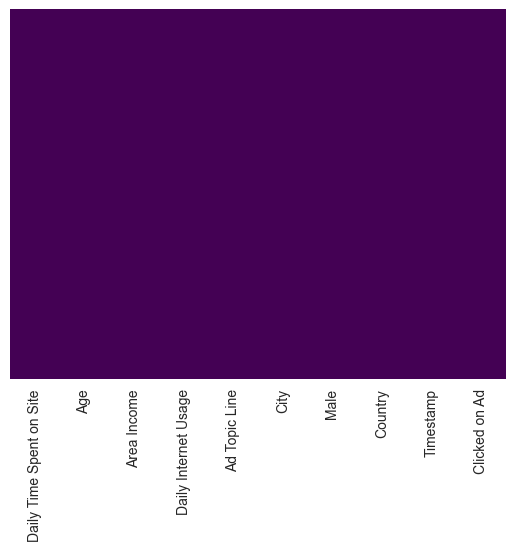

In [6]:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum()

In [7]:
np.isnan(df.select_dtypes(include=['number'])).sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

## <u>Conclusões:</u>
- Não foram encontrados dados nulos neste dataset.

## <u>Verificação de Dados Infinitos</u>

In [8]:
inf_mask = np.isinf(df.select_dtypes(include=['number']))
inf_mask.sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

## <u>Conclusões:</u>
- Não foram encontrados dados +infinito ou -infinito neste dataset.

## <u>Verificação de Dados Duplicados</u>

In [9]:
# Verificar dados duplicados em todas as variáveis do dataset
duplicated_rows = df[df.duplicated()]
print("Número de linhas duplicadas em todo o dataset:", len(duplicated_rows))

Número de linhas duplicadas em todo o dataset: 0


## <u>Conclusões:</u>
- Não foram encontradas instancias duplicadas neste dataset.

## <u>Verificação de Outliers</u>
- <b>Primeira Verificação (Quartis):</b> Serão utilizados os quartis como base para o entendimento do que será considerado um dado discrepante;
- <b>Segunda Verificação (Z-score):</b> O Z-score é uma medida estatística que indica o quão longe um dado está da média em termos de desvios padrão. Valores de Z-score muito altos (geralmente acima de 2 ou 3 desvios padrão) podem indicar a presença de outliers.
- <b>Terceira Verificação (IQR):</b> O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os valores que estão muito abaixo de Q1 - 1,5 * IQR ou muito acima de Q3 + 1,5 * IQR são considerados outliers pelo método IQR.
- <b> Quarta Verificação (Boxplot):</b> Serão feitos gráficos de boxplot em que os outliers serão representados como pontos fora dos limites de cada caixa;

In [10]:
# Quartis

# Selecionando apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['number'])

valores_acima = (colunas_numericas > colunas_numericas.quantile(0.75)).sum().sum()

valores_abaixo = (colunas_numericas < colunas_numericas.quantile(0.25)).sum().sum()

print(f'Existem {valores_acima} valores no dataset que são maiores que o terceiro quartil, indicando serem outliers.')
print(f'Existem {valores_abaixo} valores no dataset que são menores que o primeiro quartil, indicando serem outliers.')

Existem 981 valores no dataset que são maiores que o terceiro quartil, indicando serem outliers.
Existem 966 valores no dataset que são menores que o primeiro quartil, indicando serem outliers.


In [11]:
# Z-score
from scipy.stats import zscore

# Calcular o Z-score para todas as variáveis numéricas
df_zscore = df.select_dtypes(include=['number']).apply(zscore)

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)].any(axis=1)
print(f'Número de outliers identificados pelo Z-score: {outliers_zscore.sum()}\n')

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)]

# Visualizar os outliers por coluna
outliers_by_column = outliers_zscore.stack().reset_index()
outliers_by_column.columns = ['Index', 'Column', 'Z-score']
print("Outliers identificados por coluna:")
print(outliers_by_column)

# Visualizar os outliers por instância
outliers_by_instance = outliers_zscore.any(axis=1)
outliers_indices = outliers_by_instance[outliers_by_instance].index
print("\nÍndices das instâncias com outliers:")
print(outliers_indices)


Número de outliers identificados pelo Z-score: 3

Outliers identificados por coluna:
   Index       Column   Z-score
0    692  Area Income -3.017017
1    768  Area Income -3.058154
2    778  Area Income -3.000054

Índices das instâncias com outliers:
Index([692, 768, 778], dtype='int64')


In [12]:
# Filtrar o DataFrame original para incluir apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular o IQR (Intervalo Interquartil) para cada variável numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers em cada coluna numérica usando o método IQR
outliers_indices = []
outliers_columns = []

for col in df_numeric.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outliers_indices.extend(outliers.index)
        outliers_columns.extend([col] * len(outliers))

# Criar um DataFrame com os índices das instâncias com outliers e as colunas correspondentes
outliers_df = pd.DataFrame({'Index': outliers_indices, 'Outlier_Column': outliers_columns})

# Remover duplicatas se houver
outliers_df = outliers_df.drop_duplicates()

# Mostrar o número de outliers identificados e a tabela com os índices das instâncias e colunas com outliers
print("Número de outliers identificados pelo método IQR:", len(outliers_df))
print("\nÍndices das instâncias com outliers e colunas correspondentes:")
print(outliers_df)


Número de outliers identificados pelo método IQR: 9

Índices das instâncias com outliers e colunas correspondentes:
   Index Outlier_Column
0    135    Area Income
1    410    Area Income
2    510    Area Income
3    640    Area Income
4    665    Area Income
5    692    Area Income
6    768    Area Income
7    778    Area Income
8    952    Area Income


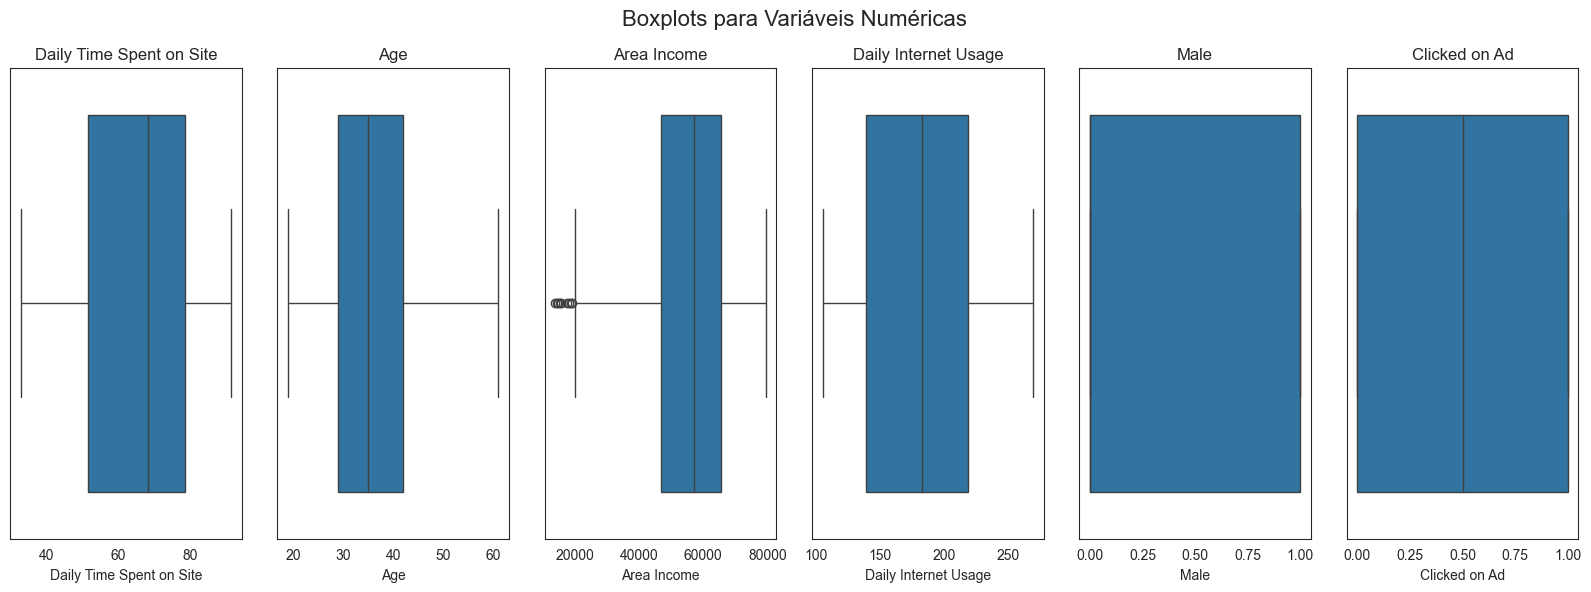

In [13]:
# Boxplots

# Filtrando apenas a ista das variáveis numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Configuração dos subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 6), sharey=True)
fig.suptitle('Boxplots para Variáveis Numéricas', fontsize=16)

# Criar boxplots para cada variável numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## <u>Conclusões:</u>
- Analisando os outliers identificados tanto pelo <i>Z-score</i> quanto pelo método <i>IQR</i>, observamos que a variável "Area Income" é a principal responsável por esses valores extremos. Esses outliers podem ser resultado de diferenças significativas na renda em determinadas áreas, o que pode ser considerado válido e não necessariamente um erro nos dados. No entanto, é importante estar ciente desses valores extremos ao realizar análises estatísticas e modelagem preditiva, pois podem influenciar os resultados e a interpretação das análises.

# <u>Etapa #2.Tratamento dos Dados</u>
Ao visualizar algumas amostras dos dados percebi duas necessidades imediatas de tratamento para podermos iniciar a análise exploratória:
1. Na variável 'Ad Topic Line' temos erros de formatação no em valores como <i>4thgeneration</i> que falta o espaço, irei verificar quantas instâncias possuem este erro e tratar estes dados.
2. Na variável 'Timestamp' irei separar a data da hora para realizar análises temporais separadamente.

In [14]:
# Função para identificar padrões incorretos
def encontrar_formato_errado(text):
    return re.search(r'\d+(th|st|nd|rd)generation', text) is not None

# Aplicar a função à coluna 'Ad Topic Line'
df['Formato Incorreto'] = df['Ad Topic Line'].apply(encontrar_formato_errado)

series_incorretos = df[df['Formato Incorreto'] == True]['Ad Topic Line']

df_incorretos = pd.DataFrame(series_incorretos.values, columns=['Valores Incorretos'])

df.drop('Formato Incorreto', axis=1, inplace=True)
display(df_incorretos.sample(2))
print(f'Quantidade total de valores incorretos: {len(df_incorretos)}')

,Valores Incorretos
7,Total 5thgeneration standardization
19,Polarized 5thgeneration matrix


Quantidade total de valores incorretos: 38


In [15]:
# Função para corrigir padrões incorretos
def corrigir_formato_errado(text):
    return re.sub(r'(\d+)(th|st|nd|rd)generation', r'\1\2 generation', text)

# Aplicar a correção à coluna 'Ad Topic Line'
df['Ad Topic Line'] = df['Ad Topic Line'].apply(corrigir_formato_errado)

# Exibir o DataFrame após a correção
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5th generation orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [16]:
# Convertendo a coluna 'Timestamp' para datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Criando as novas colunas de data e hora
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

# Exibindo as primeiras linhas para verificar as alterações
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time
0,68.95,35,61833.9,256.09,Cloned 5th generation orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11


## <u>Conclusões:</u>

- Estes dados ficícios estavam relativamente bastante limpos e tratados então não foram feitas grandes mudanças.

# <u>Etapa #3. Análise Exploratória de Dados</u>

- Para uma visão geral de todos os dados inicialmente será criado um gráfico pairplot e um heatmap da matriz de correlação entre as variáveis.
- Serão respondidas perguntas de negócio com os dados em busca de insights relevantes. Estas perguntas estarão alinhadas com o objetivo do projeto.
- Por fim para as variáveis categóricas e temporais serão feitas análises com base em suas frequências buscando entender os locais e momentos de maior engajamentos dos usuários com os anúncios.

In [17]:
df = df.replace(to_replace=[np.inf,-np.inf],
                value=np.nan)

In [18]:
df_numeric = df.select_dtypes(include=['number'])

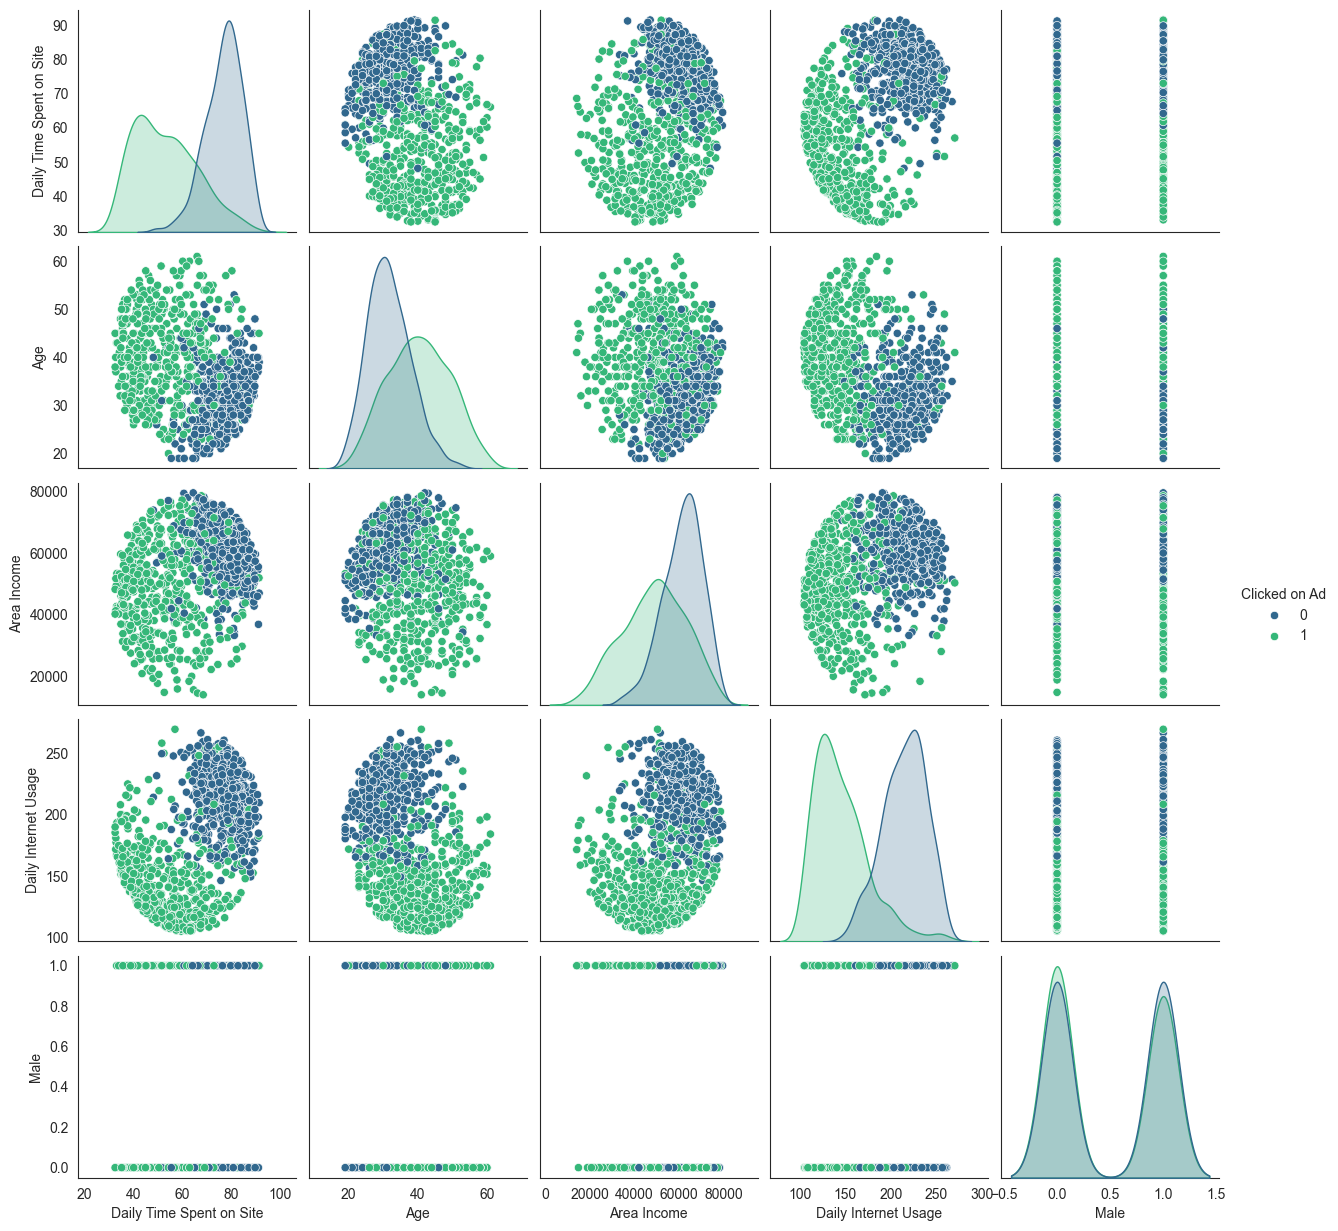

In [19]:
sns.pairplot(df_numeric, hue='Clicked on Ad', palette='viridis')

In [20]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<Axes: >

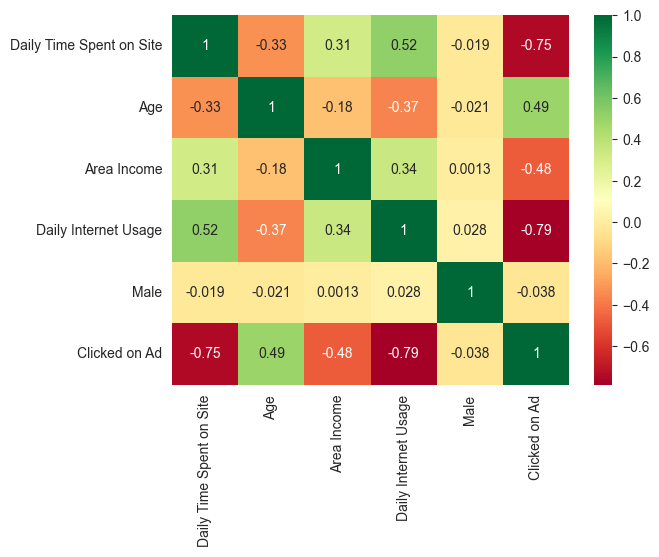

In [21]:
sns.heatmap(data=correlation_matrix,
            annot=True,
            cmap='RdYlGn')

In [22]:
# Crie uma série com as maiores correlações
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Pegue as 5 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
count = 0
for index, value in top_10_correlations.items():
    count += 1
    print(f"{count}: {index[0]} - {index[1]}: {value}")

1: Daily Time Spent on Site - Daily Internet Usage: 0.5186584753371867
2: Age - Clicked on Ad: 0.49253126555603755
3: Area Income - Daily Internet Usage: 0.3374955328652761
4: Area Income - Daily Time Spent on Site: 0.31095441252288275
5: Daily Internet Usage - Male: 0.02801232630484873
6: Area Income - Male: 0.0013223588849242528
7: Male - Daily Time Spent on Site: -0.018950854598913703
8: Age - Male: -0.021044063680953545
9: Clicked on Ad - Male: -0.03802746574898813
10: Age - Area Income: -0.18260495503262136


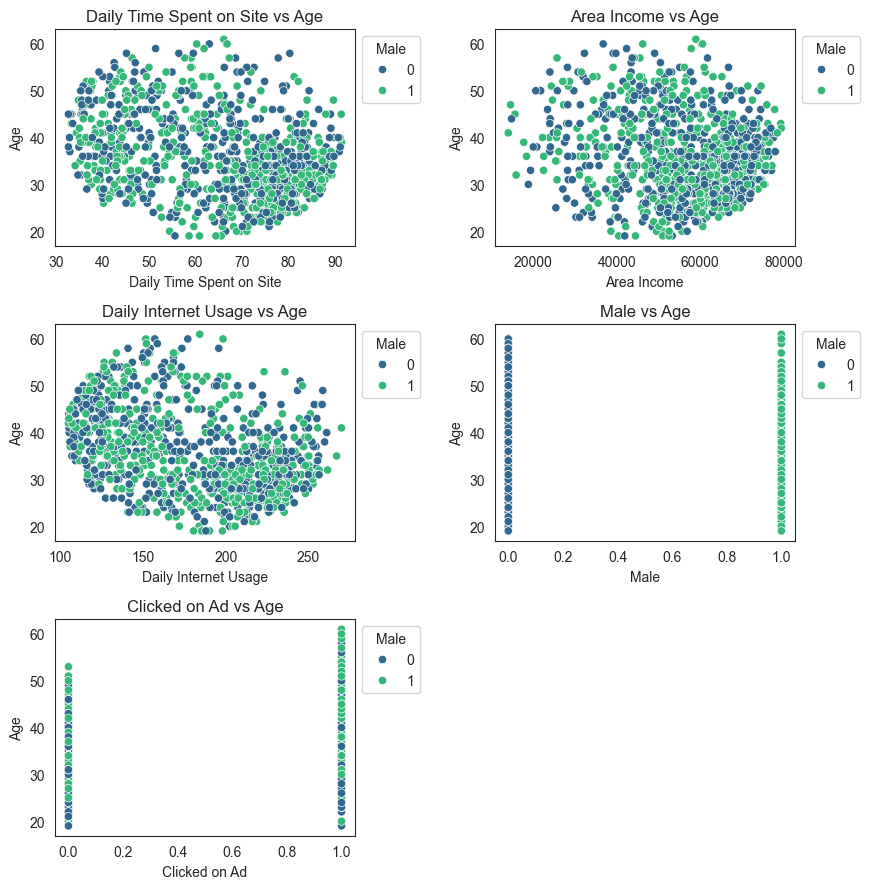

In [23]:
# Definindo as colunas numéricas exceto 'Age'
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
colunas_numericas.remove('Age')

# Número de colunas numéricas para determinar o tamanho do grid de subplots
num_plots = len(colunas_numericas)
num_rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 3 * num_rows))

for i, column in enumerate(colunas_numericas):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.scatterplot(data=df, y='Age', x=column, hue='Male', ax=ax, palette='viridis')
    ax.set_title(f'{column} vs Age')
    # Ajuste para a legenda
    ax.legend(title='Male', loc='upper left', bbox_to_anchor=(1, 1))

# Se o número total de plots é ímpar, remove o último subplot vazio
if num_plots % 2:
    fig.delaxes(axes[-1, -1])

# Ajustar layout para não sobrepor as legendas
plt.tight_layout()
plt.subplots_adjust(right=1)  # Ajuste este valor conforme necessário para acomodar as legendas

plt.show()

## <u>Pergunta 01:</u> Qual é a relação entre o tempo diário gasto no site e a probabilidade de um usuário clicar no anúncio?
Esta pergunta nos ajudará a entender se existe uma associação entre o tempo que um usuário passa no site e a chance de ele clicar em um anúncio.

In [24]:
df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'].describe()

count    500.000000
mean      53.145780
std       12.822091
min       32.600000
25%       42.837500
50%       51.530000
75%       62.075000
max       91.370000
Name: Daily Time Spent on Site, dtype: float64

In [25]:
df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'].describe()

count    500.000000
mean      76.854620
std        7.560031
min       48.220000
25%       72.077500
50%       77.650000
75%       82.070000
max       91.430000
Name: Daily Time Spent on Site, dtype: float64

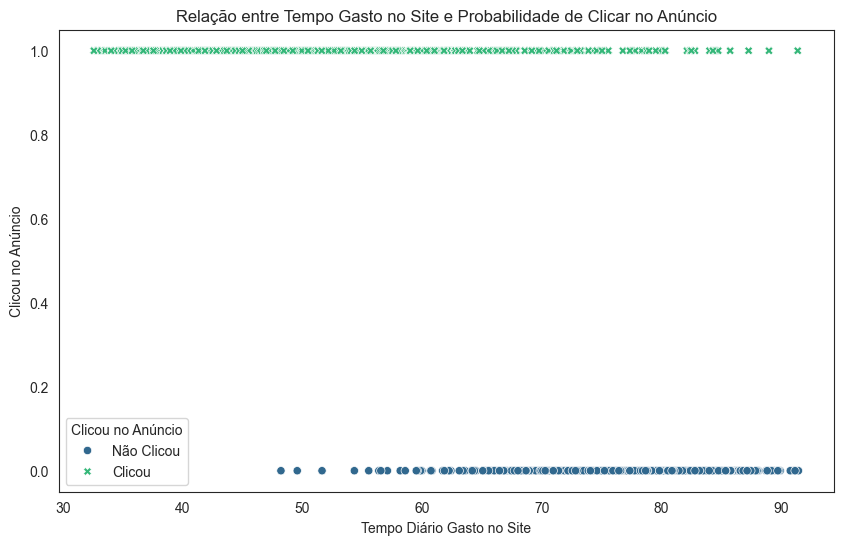

In [26]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o gráfico
scatter_plot = sns.scatterplot(data=df, x='Daily Time Spent on Site', y='Clicked on Ad', hue='Clicked on Ad',
                               palette='viridis', style='Clicked on Ad')

# Ajustando os títulos e labels
scatter_plot.set_title('Relação entre Tempo Gasto no Site e Probabilidade de Clicar no Anúncio')
scatter_plot.set_xlabel('Tempo Diário Gasto no Site')
scatter_plot.set_ylabel('Clicou no Anúncio')

# Ajustando a legenda
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles, ['Não Clicou', 'Clicou'], title='Clicou no Anúncio')

plt.show()


## <u>Conclusões:</u>
<b>Tempo Médio:</b> Os usuários que clicaram no anúncio tendem a passar menos tempo no site em média (53.15 minutos) em comparação com aqueles que não clicaram (76.85 minutos). Isso sugere uma possível relação inversa entre o tempo gasto no site e a probabilidade de clicar no anúncio.

<b>Variabilidade:</b> A variabilidade (medida pelo desvio padrão) no tempo gasto no site é maior para os usuários que clicaram no anúncio (12.82 minutos) em comparação com aqueles que não clicaram (7.56 minutos). Isso pode indicar uma maior diversidade de comportamentos entre os usuários que clicaram nos anúncios.

<b>Distribuição:</b> Os quartis e a distribuição dos tempos gastos no site para os dois grupos também podem indicar diferenças na distribuição desses dados, o que é importante para entender a relação entre as variáveis.

<b>Outliers:</b> Os valores mínimos e máximos podem indicar a presença de outliers nos dados, que podem influenciar a interpretação da relação entre as variáveis.

Com base nessas estatísticas descritivas, podemos inferir que há uma relação entre o tempo diário gasto no site e a probabilidade de clicar no anúncio, sugerindo uma possível tendência de que usuários que passam menos tempo no site têm maior probabilidade de clicar nos anúncios.

### <u>Pergunta 02:</u> Existe uma diferença significativa no tempo médio gasto no site entre os usuários que clicaram nos anúncios e os que não clicaram?

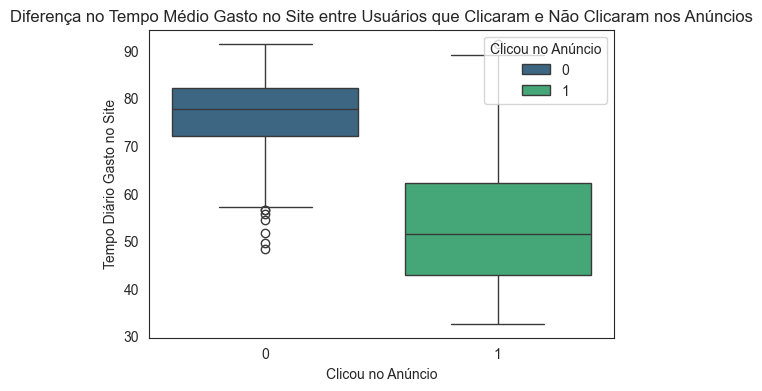

In [27]:
# Boxplot com Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site', hue='Clicked on Ad', palette='viridis')
plt.title('Diferença no Tempo Médio Gasto no Site entre Usuários que Clicaram e Não Clicaram nos Anúncios')
plt.xlabel('Clicou no Anúncio')
plt.ylabel('Tempo Diário Gasto no Site')
plt.legend(title='Clicou no Anúncio', loc='upper right')
plt.show()

In [28]:
tempo_nao_clicou = df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site']
tempo_clicou = df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site']

In [29]:
from scipy.stats import ttest_ind

# Filtrando o dataset para apenas os dados do tempo gasto no site diário dos usuários que clicaram e não clicaram no anúncio
tempo_nao_clicou = df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site']
tempo_clicou = df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site']

# Executar o teste t de Student
t_stat, p_value = ttest_ind(tempo_clicou, tempo_nao_clicou)

# Imprimir o resultado do teste
print('Estatística t:', t_stat)
print('Valor p:', p_value)

Estatística t: -35.61636085995531
Valor p: 5.877384244135832e-180


## <u>Conclusões:</u>
O resultado do teste t de Student que obteve indica uma diferença altamente significativa no tempo médio gasto no site entre os usuários que clicaram nos anúncios e aqueles que não clicaram.

A estatística t é de aproximadamente -35.62.
O p-value é extremamente baixo, sendo praticamente zero (5.88e-180), o que indica uma diferença estatisticamente significativa.
Esses resultados sugerem fortemente que há uma diferença significativa no tempo médio gasto no site entre os dois grupos (clicaram nos anúncios e não clicaram). Nesse contexto, o valor negativo da estatística t indica que o tempo médio gasto no site pelos usuários que clicaram nos anúncios é significativamente menor do que o tempo médio gasto pelos que não clicaram.

Portanto, podemos concluir que a probabilidade de clicar no anúncio está relacionada ao tempo gasto no site, e essa diferença é estatisticamente significativa com base nos dados analisados. Essa informação pode ser valiosa para estratégias de marketing e otimização de anúncios.

## <u>Pergunta 03:</u> Como a idade dos usuários está distribuída entre os que clicaram e os que não clicaram no anúncio?
Esta pergunta nos dará informações sobre a distribuição da idade dos usuários em relação à interação com o anúncio.

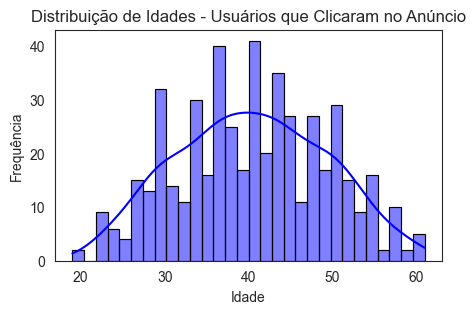

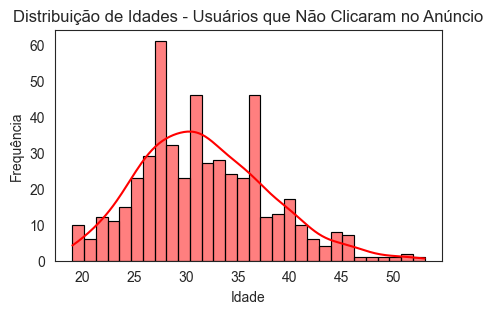

In [30]:
# Histograma para a distribuição de idades dos usuários que clicaram no anúncio
plt.figure(figsize=(5, 3))
sns.histplot(df[df['Clicked on Ad'] == 1]['Age'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribuição de Idades - Usuários que Clicaram no Anúncio')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Histograma para a distribuição de idades dos usuários que não clicaram no anúncio
plt.figure(figsize=(5, 3))
sns.histplot(df[df['Clicked on Ad'] == 0]['Age'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribuição de Idades - Usuários que Não Clicaram no Anúncio')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


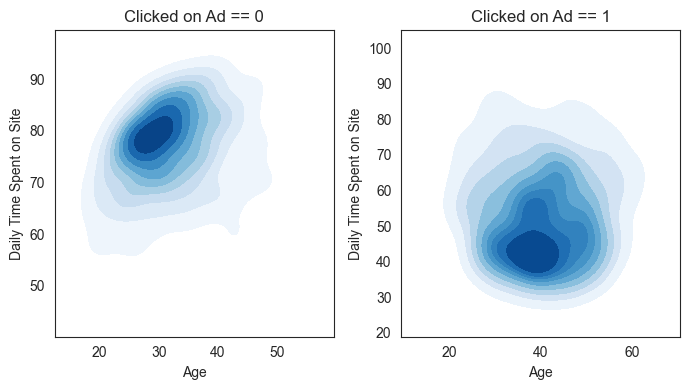

In [31]:
# Filtrando os dataframes
df_nao_clicou = df[df['Clicked on Ad'] == 0]
df_clicou = df[df['Clicked on Ad'] == 1]

# Criando os subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plotando os jointplots
sns.kdeplot(data=df_nao_clicou, x='Age', y='Daily Time Spent on Site', shade=True, cmap='Blues', ax=axs[0])
sns.kdeplot(data=df_clicou, x='Age', y='Daily Time Spent on Site', shade=True, cmap='Blues', ax=axs[1])

# Configurando os títulos dos subplots
axs[0].set_title('Clicked on Ad == 0')
axs[1].set_title('Clicked on Ad == 1')

# Exibindo os subplots
plt.tight_layout()
plt.show()


In [32]:
df[df['Clicked on Ad'] == 0]['Age'].describe()

count    500.000000
mean      31.684000
std        6.212998
min       19.000000
25%       27.000000
50%       31.000000
75%       36.000000
max       53.000000
Name: Age, dtype: float64

In [33]:
df[df['Clicked on Ad'] == 1]['Age'].describe()

count    500.000000
mean      40.334000
std        8.856598
min       19.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       61.000000
Name: Age, dtype: float64

In [34]:
df[df['Clicked on Ad'] == 1]['Age'].describe() - df[df['Clicked on Ad'] == 0]['Age'].describe()

count     0.000000
mean      8.650000
std       2.643599
min       0.000000
25%       7.000000
50%       9.000000
75%      11.000000
max       8.000000
Name: Age, dtype: float64

## <u>Conclusões:</u>
<b>Diferença nas Idades Médias:</b> A média de idade dos usuários que clicaram no anúncio (40.33 anos) é significativamente maior do que a média de idade dos usuários que não clicaram (31.68 anos). Isso sugere uma possível tendência de usuários mais velhos clicarem mais nos anúncios.

<b>Variação e Dispersão:</b> O desvio padrão para os usuários que clicaram (8.86 anos) é maior do que para os que não clicaram (6.21 anos), indicando uma maior dispersão das idades no grupo dos que clicaram. Isso pode ser interpretado como uma variedade maior de faixas etárias entre os usuários que clicaram.

<b>Quartis e Mediana:</b> Os quartis e a mediana também mostram diferenças significativas entre os dois grupos. Os usuários que clicaram têm valores mais altos para essas medidas estatísticas, indicando uma distribuição de idades mais alta no grupo dos que clicaram.

Com base nessas análises, podemos entender que a idade dos usuários que clicaram no anúncio tende a ser mais alta em comparação com os que não clicaram. Isso sugere que faixas etárias mais altas podem ter uma probabilidade maior de clicar no anúncio.

## <u>Pergunta 04:</u> Existe uma correlação entre a renda dos usuários daquela área e a probabilidade de ele clicar no anúncio? 
Investigar se a renda média da área em que o usuário vive está relacionada à sua propensão para clicar em um anúncio pode ser uma informação valiosa.

Para esta pergunta serão realizadas:
- Analise descritiva da Renda para entendermos a distribuição dos grupos que clicaram e não clicaram no anúncio.
- Visualização gráfica da Renda vs. Clicou no Anúncio através de um gráfico de dispersão (scatter plot) para visualizar a relação entre a renda da área e a probabilidade de clicar no anúncio. Este gráfico ajudará a identificar se existe alguma correlação aparente.
- Por fim, será calculado o coeficiente de correlação Pearson, para obter uma medida numérica da correlação entre a renda da área e a probabilidade de clicar no anúncio.

In [35]:
# Filtrar dados para usuários que clicaram no anúncio (Clicked on Ad == 1) e não clicaram (Clicked on Ad == 0)
df_clicou = df.select_dtypes(include=['number'])[df['Clicked on Ad'] == 1]
df_nao_clicou = df.select_dtypes(include=['number'])[df['Clicked on Ad'] == 0]

In [36]:
# Análise descritiva da renda da área referente aos usuários que clicaram no anúncio
display(df_clicou['Area Income'].describe())

count      500.000000
mean     48614.413740
std      14116.242232
min      13996.500000
25%      39106.620000
50%      49417.255000
75%      59241.045000
max      78520.990000
Name: Area Income, dtype: float64

In [37]:
# Análise descritiva da renda da área referente aos usuários que não clicaram no anúncio
display(df_nao_clicou['Area Income'].describe())

count      500.00000
mean     61385.58642
std       8904.06018
min      33239.20000
25%      55606.66250
50%      62275.40500
75%      67518.78250
max      79484.80000
Name: Area Income, dtype: float64

Correlações entre 'Clicked on Ad' e 'Area Income':


,Clicked on Ad,Area Income
Clicked on Ad,1.000000,-0.476255
Area Income,-0.476255,1.000000


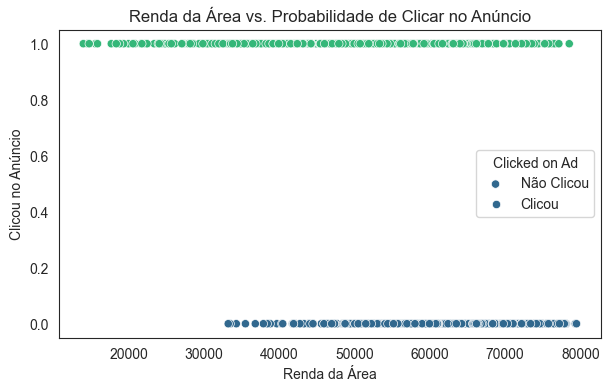

In [38]:
# Selecionar apenas as correlações entre 'Clicked on Ad' e 'Area Income'
# Utilizando a matriz de correlação criada no início do projeto.
correlacao_clicked_income = correlation_matrix.loc[['Clicked on Ad', 'Area Income'], ['Clicked on Ad', 'Area Income']]
print("Correlações entre 'Clicked on Ad' e 'Area Income':")
display(correlacao_clicked_income)

# Criar gráfico de dispersão para a relação entre renda da área e probabilidade de clicar no anúncio
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='Area Income', y='Clicked on Ad', hue='Clicked on Ad', palette='viridis')
plt.title('Renda da Área vs. Probabilidade de Clicar no Anúncio')
plt.xlabel('Renda da Área')
plt.ylabel('Clicou no Anúncio')
plt.legend(title='Clicked on Ad', loc='center right', labels=['Não Clicou', 'Clicou'])
plt.show()

## <u>Conclusões:</u>

<b>Análise Descritiva</b>:
A análise descritiva das rendas nas áreas dos usuários que clicaram no anúncio em comparação com aqueles que não clicaram revela diferenças significativas. Em média, a renda da área para usuários que clicaram no anúncio é de aproximadamente 48,614 USD, enquanto para os que não clicaram, é significativamente maior, cerca de 61,386 USD. Além disso, a variabilidade (desvio padrão) na renda da área entre os usuários que clicaram no anúncio é maior do que entre os que não clicaram, sugerindo uma maior dispersão nos níveis de renda entre o primeiro grupo.

<b>Correlação</b>:
A correlação entre "Clicked on Ad" e "Area Income" é de -0.476, indicando uma correlação negativa moderada. Isso significa que, à medida que a renda da área aumenta, a probabilidade de um usuário clicar em um anúncio tende a diminuir.

Os dados sugerem que há uma tendência dos usuários com rendas mais baixas em determinadas áreas serem mais propensos a clicar em anúncios em comparação com aqueles com rendas mais altas. Essa informação pode ser crucial para estratégias de marketing e publicidade, indicando que anúncios direcionados a áreas com rendas mais baixas podem ter uma taxa de cliques mais alta. Entretanto, é importante considerar que correlação não implica causalidade e outros fatores não analisados aqui também podem influenciar a probabilidade de um usuário clicar em um anúncio.

Para empresas e anunciantes, isso implica na importância de segmentar suas campanhas publicitárias com base em análises socioeconômicas das áreas-alvo. Campanhas que oferecem produtos ou serviços mais acessíveis, promoções ou informações de valor para este segmento de público podem ter maior eficácia em gerar engajamento e conversões.

Em síntese, a análise sugere uma estratégia de segmentação de mercado baseada na renda da área, permitindo a otimização de campanhas para alcançar públicos mais propensos ao engajamento com anúncios. Isso reforça a importância de uma abordagem analítica no planejamento de campanhas de marketing digital, maximizando a eficiência dos investimentos publicitários.

## <u>Pergunta 05:</u> Qual é a diferença na média de uso diário da internet entre os usuários que clicaram e os que não clicaram no anúncio? 
Esta pergunta nos ajuda a entender se o comportamento de uso da internet dos usuários influencia sua propensão para clicar em anúncios.

In [39]:
# Calculando a média do uso diário da internet para usuários que clicaram no anúncio
media_uso_internet_clicou = df[df['Clicked on Ad'] == 1]['Daily Internet Usage'].mean()

# Calculando a média do uso diário da internet para usuários que não clicaram no anúncio
media_uso_internet_nao_clicou = df[df['Clicked on Ad'] == 0]['Daily Internet Usage'].mean()

# Calculando a diferença na média do uso diário da internet
diferenca_media_uso_internet = media_uso_internet_nao_clicou - media_uso_internet_clicou

print(f"Média de uso diário da internet para usuários que clicaram no anúncio: {media_uso_internet_clicou:.2f}")
print(f"Média de uso diário da internet para usuários que não clicaram no anúncio: {media_uso_internet_nao_clicou:.2f}")
print(f"Diferença na média de uso diário da internet entre os grupos: {diferenca_media_uso_internet:.2f}")

Média de uso diário da internet para usuários que clicaram no anúncio: 145.49
Média de uso diário da internet para usuários que não clicaram no anúncio: 214.51
Diferença na média de uso diário da internet entre os grupos: 69.03


## <u>Conclusões:</u>

Com base nos resultados obtidos, é possível concluir que existe uma diferença significativa no uso diário da internet entre os usuários que clicaram nos anúncios e aqueles que não clicaram. Usuários que não clicaram em anúncios apresentam uma média de uso diário da internet substancialmente maior, com 214.51 minutos, em comparação aos usuários que clicaram em anúncios, cuja média é de 145.49 minutos. Esta diferença de aproximadamente 69.03 minutos sugere que o comportamento de navegação na internet pode influenciar a probabilidade de um usuário clicar em anúncios.

## <u>Pergunta 06:</u> Existe uma relação entre o gênero dos usuários e a probabilidade de clicar no anúncio?
Investigar se o gênero dos usuários tem impacto na interação com os anúncios pode ser uma informação relevante para o modelo.
- Para esta pergunta será obtida a distribuição de gêneros calculando a proporção de usuários de cada gênero que clicaram e não clicaram nos anúncios.
- Para avaliar se a diferença observada na proporção de cliques entre gêneros é estatisticamente significativa, aplicaremos o teste <i>chi-quadrado</i> de independência.

In [40]:
contagem_genero = df.groupby(by=['Male','Clicked on Ad']).size().unstack()
display(contagem_genero)

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


In [41]:
from scipy.stats import chi2_contingency

# Aplicar o teste chi-quadrado
chi2, p, dof, expected = chi2_contingency(contagem_genero)

print(f"Chi-squared: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Chi-squared: 1.30
P-value: 0.2546


## <u>Conclusões:</u>

<b>Distribuição de Clicadores e Não Clicadores por Gênero:</b>

- Para usuários do sexo feminino (Male = 0), temos 250 usuárias que não clicaram no anúncio e 269 que clicaram.
- Para usuários do sexo masculino (Male = 1), temos 250 usuários que não clicaram no anúncio e 231 que clicaram.

<b>Diferença na Interatividade com o Anúncio entre Gêneros:</b>

- A maioria das usuárias do sexo feminino clicou no anúncio em comparação com os usuários do sexo masculino.
-Os usuários do sexo masculino têm uma taxa relativamente menor de cliques em comparação com as usuárias do sexo feminino.

<b>Importância do Gênero na Interação com Anúncios:</b>

- O gênero parece ter uma influência na probabilidade de clicar no anúncio, pois há uma diferença na distribuição de cliques entre usuários do sexo feminino e masculino.
Essas conclusões sugerem que o gênero pode ser uma variável importante a ser considerada em modelos de previsão de cliques em anúncios, pois há uma tendência diferente de interação com anúncios entre usuários do sexo feminino e masculino.

<b>Teste <i>chi-quadrado</i></b>:

- Por fim com base nos resultados do teste <i>chi-quadrado</i>, com um valor de chi-quadrado de 1.30 e um valor-p de 0.2546, não temos evidências suficientes para rejeitar a hipótese nula de que o gênero e a probabilidade de clicar no anúncio são independentes, indicando uma relação significativa entre essas variáveis. 
Isso sugere que, ao nível de confiança de 95%, não existe uma relação estatisticamente significativa entre o gênero dos usuários e a probabilidade de clicar em um anúncio.

Essas conclusões sugerem que o gênero pode ser uma variável importante a ser considerada em modelos de previsão de cliques em anúncios, pois há uma tendência diferente de interação com anúncios entre usuários do sexo feminino e masculino.




# <u>Análises nas variáveis Categóricas</u>
- Serão verificados os paises e cidades mais frequentes de onde os usuários acessam o site.
- As cidades de onde os usuários mais clicaram nos anúncios;

## <u>Países com a maior quantidade de usuários</u>

In [42]:
# Contagem de ocorrências de países
country_counts = df['Country'].value_counts().reset_index()

country_counts.head()

,Country,count
0,France,9
1,Czech Republic,9
2,Peru,8
3,Turkey,8
4,Greece,8


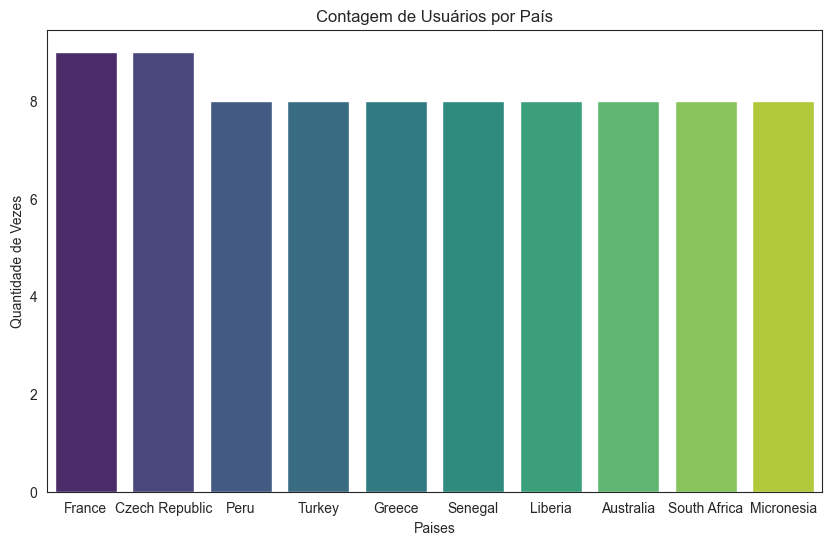

In [43]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y='count', x='Country', data=country_counts.head(10), palette='viridis')
plt.title('Contagem de Usuários por País')
plt.ylabel('Quantidade de Vezes')
plt.xlabel('Paises')
plt.show()

## <u>Conclusões:</u>

Com base na contagem de ocorrências de países no conjunto de dados, podemos observar que há uma variedade de nacionalidades representadas, com algumas delas tendo uma presença mais frequente do que outras. Por exemplo, países como França e República Tcheca têm o maior número de ocorrências, indicando uma maior representatividade de usuários dessas regiões no conjunto de dados de publicidade.

## <u>Cidades com a maior quantidade de usuários</u>

In [44]:
# Contagem de ocorrências de cidades
city_counts = df['City'].value_counts().reset_index()

city_counts.head(5)

,City,count
0,Lisamouth,3
1,Williamsport,3
2,Wrightburgh,2
3,Lake Jose,2
4,Robertfurt,2


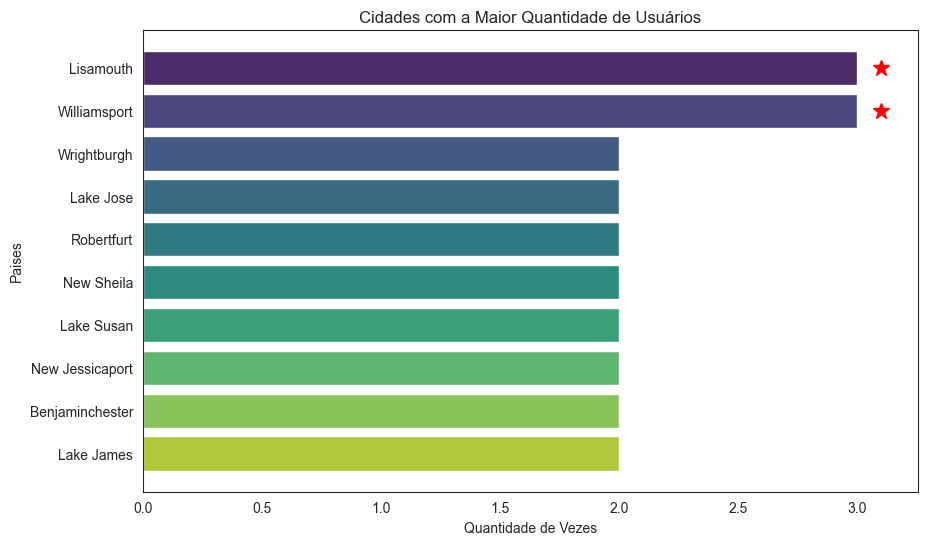

In [45]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x='count', y='City', data=city_counts.head(10), palette='viridis')

# Plotando um marcador * na cidade de maior quantidade
bar_plot.plot(3.1, 0, "*", markersize=12, color="r")

# Plotando um marcador * na cidade de maior quantidade
bar_plot.plot(3.1, 1, "*", markersize=12, color="r")

plt.title('Cidades com a Maior Quantidade de Usuários')
plt.xlabel('Quantidade de Vezes')
plt.ylabel('Paises')
plt.show()

## <u>Conclusões:</u>

Ao analisarmos a contagem de ocorrências de cidades no conjunto de dados, identificamos que algumas cidades se destacam com um número maior de registros em comparação com outras. Por exemplo, cidades como Lisamouth e Williamsport apresentam um maior número de ocorrências, indicando uma concentração significativa de usuários dessas localidades nos dados de publicidade.

## <u>Cidades em que mais usuários clicam nos anúncios</u>

In [46]:
top10_cidades = df[df['Clicked on Ad'] == 1]['City'].value_counts().reset_index().head(10)
top10_cidades

,City,count
0,Lisamouth,2
1,Michelleside,2
2,Williamsport,2
3,Robertfurt,2
4,West Amanda,2
5,West Shannon,2
6,Millerbury,2
7,Lake David,2
8,Lake James,2
9,South Lisa,2


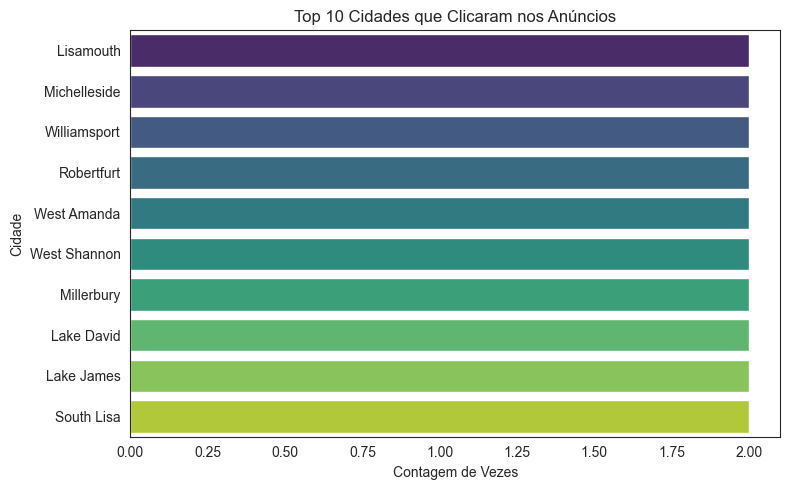

In [47]:
plt.figure(figsize=(8, 5))

sns.barplot(data=top10_cidades,
            x='count',
            y='City',
            palette='viridis',
            orient='h')

plt.title('Top 10 Cidades que Clicaram nos Anúncios')
plt.xlabel('Contagem de Vezes')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

## <u>Conclusões:</u>

Após analisar as top 10 cidades com mais usuários que clicaram nos anúncios, identificamos que algumas cidades, como Lisamouth, Michelleside, Williamsport, Robertfurt, West Amanda, West Shannon, Millerbury, Lake David, Lake James e South Lisa, têm duas ocorrências cada no conjunto de dados.

Ao comparar essas cidades com as que têm mais usuários em geral, podemos observar que algumas delas também estão presentes entre as mais frequentes nos cliques nos anúncios. Isso sugere que essas cidades não apenas têm uma alta concentração de usuários, mas também uma atividade significativa em relação aos anúncios, indicando um potencial interesse e engajamento dos usuários dessas regiões nas campanhas publicitárias.

# <u>Meses com a maior frequência de cliques nos anúncios</u>

In [48]:
# Criando um dataframe que receberá apenas as instâncias de usuarios que clicaram nos anúncios
df_clicou_anuncio = df[df['Clicked on Ad'] == 1]

In [49]:
df_maiores_meses = (df_clicou_anuncio['Timestamp'].dt.month).value_counts().reset_index()

df_maiores_meses.rename(columns={'Timestamp':'Mês', 'count':'Quantidade de Cliques'},
                        inplace=True)

# Mapear o número do mês para o nome do mês
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho'}

# Substituir os números dos meses pelos nomes dos meses no DataFrame
df_maiores_meses['Mês'] = df_maiores_meses['Mês'].map(meses)


df_maiores_meses

,Mês,Quantidade de Cliques
0,Fevereiro,83
1,Maio,79
2,Março,74
3,Abril,74
4,Junho,71
5,Janeiro,69
6,Julho,50


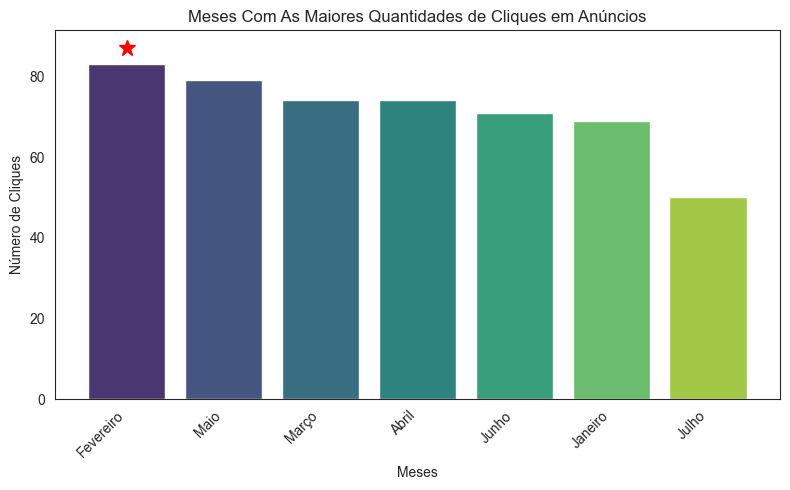

In [50]:
# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_maiores_meses,
                       x='Mês',
                       y='Quantidade de Cliques',
                       palette='viridis')

# Plotando um marcador * no mês de maior quantidade
bar_plot.plot(0, 87, "*", markersize=12, color="r")

plt.title('Meses Com As Maiores Quantidades de Cliques em Anúncios')

# Ajustar espaçamento entre os rótulos
plt.xticks(rotation=45, ha='right')
plt.xlabel('Meses')
plt.ylabel('Número de Cliques')
plt.tight_layout()
plt.show()

## <u>Conclusões:</u>
Ao analisar as ocorrências de cliques nos anúncios ao longo dos meses, observamos que o mês de Fevereiro teve o maior número de cliques, com 83 registros. Isso pode indicar uma sazonalidade ou um evento específico que ocorreu nesse período, resultando em um aumento significativo nas interações com os anúncios. Os meses de Maio, Março e Abril também apresentaram números expressivos de cliques, com 79, 74 e 74 registros, respectivamente. Por outro lado, os meses de Julho, Junho e Janeiro registraram quantidades menores de cliques, com 50, 71 e 69 registros, respectivamente. Essa análise dos meses com maior e menor atividade de cliques pode fornecer insights importantes para estratégias de marketing e publicidade, permitindo ajustes e direcionamentos mais eficazes das campanhas.

# <u>Top 10 Dias com a maior frequência de cliques nos anúncios</u>

In [51]:
df_maiores_dias = (df_clicou_anuncio['Timestamp'].dt.date).value_counts().reset_index().head(10)
df_maiores_dias.rename(columns={'Timestamp':'Dia', 'count':'Quantidade de Cliques'},
                        inplace=True)
df_maiores_dias

,Dia,Quantidade de Cliques
0,2016-02-14,8
1,2016-05-31,7
2,2016-01-05,6
3,2016-02-17,6
4,2016-04-04,6
5,2016-02-28,6
6,2016-02-03,6
7,2016-06-29,6
8,2016-03-24,6
9,2016-02-11,5


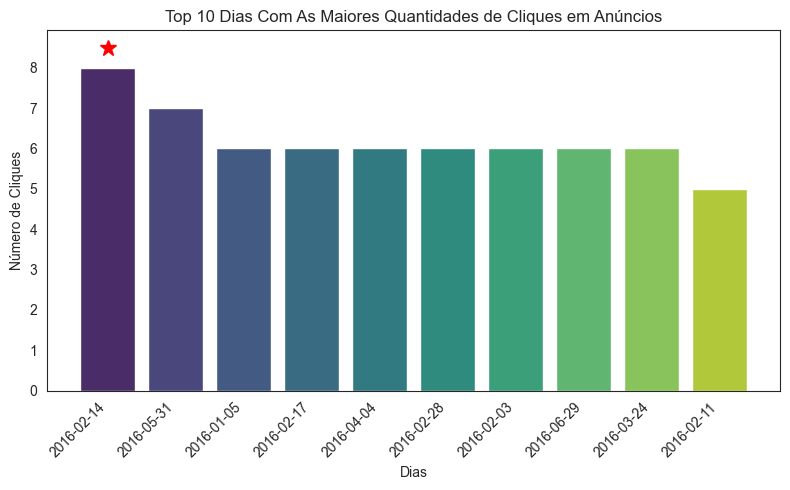

In [52]:
# Criar o gráfico de barras das datas com maior número de cliques com Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_maiores_dias,
                       x='Dia',
                       y='Quantidade de Cliques',
                       palette='viridis')

# Plotando um marcador * no mês de maior quantidade
bar_plot.plot(0, 8.5, "*", markersize=12, color="r")

plt.title('Top 10 Dias Com As Maiores Quantidades de Cliques em Anúncios')

# Ajustar espaçamento entre os rótulos
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dias')
plt.ylabel('Número de Cliques')
plt.tight_layout()
plt.show()

## <u>Conclusões:</u>
Ao analisar as ocorrências de cliques nos anúncios ao longo dos dias, observamos que o dia 14 de Fevereiro de 2016 teve o maior número de cliques, com 8 registros. Este pode ter sido um dia especial, como um feriado ou evento promocional, que gerou um aumento significativo nas interações com os anúncios. Além disso, outros dias, como 31 de Maio de 2016, 5 de Janeiro de 2016, 17 de Fevereiro de 2016, 4 de Abril de 2016, 28 de Fevereiro de 2016, 3 de Fevereiro de 2016, 29 de Junho de 2016, 24 de Março de 2016, e 11 de Fevereiro de 2016, também apresentaram quantidades expressivas de cliques, variando de 5 a 7 registros. Essa análise dos dias com maior atividade de cliques pode fornecer insights valiosos sobre períodos de pico de interesse ou engajamento dos usuários com os anúncios, ajudando a otimizar estratégias de marketing e publicidade.

# <u>Horários com a maior frequência de cliques nos anúncios</u>

In [53]:
df_maiores_horas = (df_clicou_anuncio['Timestamp'].dt.hour).value_counts().reset_index()

df_maiores_horas.rename(columns={'Timestamp':'Hora', 'count':'Quantidade de Cliques'},
                        inplace=True)
df_maiores_horas.head()

,Hora,Quantidade de Cliques
0,9,28
1,0,26
2,7,26
3,18,25
4,20,24


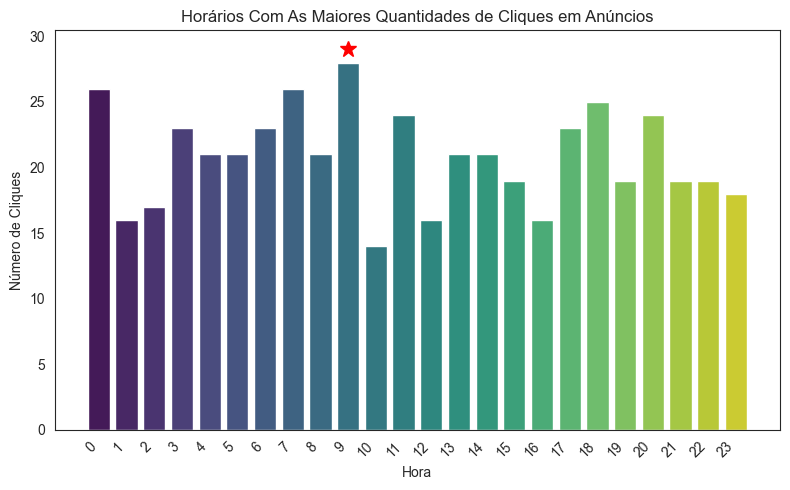

In [54]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_maiores_horas,
                       x='Hora',
                       y='Quantidade de Cliques',
                       palette='viridis')

# Plotando um marcador * no mês de maior quantidade
bar_plot.plot(9, 29, "*", markersize=12, color="r")
plt.title('Horários Com As Maiores Quantidades de Cliques em Anúncios')

# Ajustar espaçamento entre os rótulos
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hora')
plt.ylabel('Número de Cliques')
plt.tight_layout()
plt.show()

## <u>Conclusões:</u>
A análise da distribuição de cliques por hora do dia revela padrões interessantes sobre o comportamento dos usuários em relação aos anúncios. O horário com a maior quantidade de cliques é às 9h, com um total de 28 cliques, sugerindo uma atividade significativa logo após o início da jornada de trabalho ou rotina diária. Outros períodos de alta atividade incluem o início da manhã (7h) e a meia-noite (0h), ambos com 26 cliques, indicando que os usuários também estão interagindo com anúncios fora do horário comercial tradicional.

Notavelmente, o fim da tarde e o início da noite, particularmente às 18h e às 20h, com 25 e 24 cliques, respectivamente, também são momentos em que os cliques nos anúncios são frequentes. Isso pode refletir o comportamento de usuários que acessam a internet após o trabalho ou as aulas, possivelmente buscando relaxamento ou entretenimento.

Essas informações são cruciais para otimizar campanhas de anúncios, sugerindo que diferentes estratégias podem ser mais eficazes se adaptadas aos padrões de atividade dos usuários durante o dia. Campanhas direcionadas poderiam, portanto, ser planejadas para lançar ou aumentar a intensidade em horários de pico de cliques, maximizando a visibilidade e a interação dos usuários com os anúncios.







# <u>Etapa #4. Seleção das Features, Target e divisão dos dados em Treino e Teste</u>

In [55]:
# Separar as features (X) e o target (y)
X = df.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp','Date','Time'], axis=1)  # Features
y = df['Clicked on Ad']  # Target

In [56]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 800
Tamanho do conjunto de teste: 200


# <u>Etapa #5. Modelagem do Algorítmo de Regressão Logística</u>

In [57]:
# Imports necessários para o modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
# Criando o modelo
logreg_model = LogisticRegression(max_iter=1000)

In [59]:
# Treinando o modelo com os dados de treino
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# Previsões com o modelo treinado usando os dados de teste
y_pred = logreg_model.predict(X_test)

# <u>Etapa #6. Sumários, métricas e conclusões.</u>

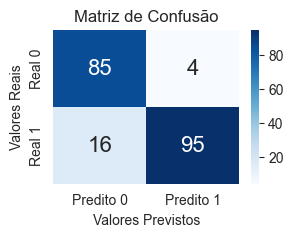

In [61]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando o heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, 
            xticklabels=['Predito 0', 'Predito 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [62]:
# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.2f}")


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200


Acurácia do modelo: 0.90


## <u>Conclusões:</u>

<b>Matriz de confusão:</b>

- Verdadeiros Positivos (VP): 85 casos em que o modelo previu corretamente que o usuário clicou no anúncio (classe 1).
- Falsos Positivos (FP): 4 casos em que o modelo previu erroneamente que o usuário clicou no anúncio, mas na verdade não clicou.
- Verdadeiros Negativos (VN): 95 casos em que o modelo previu corretamente que o usuário não clicou no anúncio (classe 0).
- Falsos Negativos (FN): 16 casos em que o modelo previu erroneamente que o usuário não clicou no anúncio, mas na verdade clicou.

A partir desses números, podemos tirar algumas conclusões:

<b>Sensibilidade (Recall) para a classe 1 (Usuários que clicaram no anúncio):</b>

- Sensibilidade = VP / (VP + FN) = 85 / (85 + 16) ≈ 0.8417 ou 84.17%.
Isso significa que o modelo identificou corretamente cerca de 84.17% dos usuários que realmente clicaram no anúncio.

<b>Especificidade para a classe 0 (Usuários que não clicaram no anúncio):</b>

- Especificidade = VN / (VN + FP) = 95 / (95 + 4) ≈ 0.9596 ou 95.96%.
Isso indica que o modelo identificou corretamente cerca de 95.96% dos usuários que não clicaram no anúncio.

<b>Taxa de Falsos Positivos (FPR):</b>

- FPR = FP / (FP + VN) = 4 / (4 + 95) ≈ 0.0404 ou 4.04%.
O FPR representa a proporção de instâncias negativas (classe 0) que foram incorretamente classificadas como positivas (falsos positivos). Neste caso, é relativamente baixo, indicando que o modelo não classifica erroneamente muitos usuários que não clicaram no anúncio como se tivessem clicado.

<u><b>Relatório de Classificação:</u></b>

<b>Precisão e Recall:</b>

- A precisão (precision) para a classe 0 (não clicou no anúncio) é de 0.84, o que indica que 84% das previsões positivas para essa classe estão corretas.
Para a classe 1 (clicou no anúncio), a precisão é de 0.96, mostrando que 96% das previsões positivas para essa classe estão corretas.
- O recall (revocação) para a classe 0 é de 0.96, o que indica que o modelo identifica corretamente 96% dos verdadeiros positivos dessa classe.
Para a classe 1, o recall é de 0.86, mostrando que o modelo identifica corretamente 86% dos verdadeiros positivos dessa classe.

<b>F1-Score:</b>

- O F1-score é uma métrica que combina precisão e recall, sendo uma média harmônica entre essas duas medidas.
O F1-score para a classe 0 é de 0.89, e para a classe 1 é de 0.90, indicando um bom equilíbrio entre precisão e recall para ambas as classes.

<b>Acurácia:</b>

- A acurácia do modelo é de 0.90, o que significa que ele está correto em 90% das previsões para o conjunto de dados de teste.

- 
Com base nas métricas de avaliação do modelo de regressão logística, podemos concluir que o modelo tem um desempenho sólido na classificação de usuários que clicaram e não clicaram nos anúncios. A precisão, recall, F1-score e acurácia são todos relativamente altos, indicando que o modelo é capaz de fazer previsões precisas para ambas as classes. No entanto, é sempre importante considerar o contexto específico do problema e as necessidades do projeto ao interpretar essas métricas e decidir se o modelo atende aos requisitos de negócios estabelecidos.

# <u>Conclusão Final:</u>

Durante este projeto de análise exploratória e modelagem preditiva, explorei um conjunto de dados fictício de publicidade buscando compreender os padrões e tendências que podem influenciar a interação dos usuários com os anúncios.
Foi feita uma análise exploratória profunda das variáveis numéricas e categóricas, explorando correlações, estatísticas descritivas e visualizações relevantes. 

Também foi feita uma análise temporal dos cliques por dia, hora e localidades, fornecendo insights adicionais sobre os momentos em que os anúncios são mais propensos a serem clicados e locais onde foram mais clicados.

Foi possível identificar padrões interessantes, como a relação entre o tempo diário gasto no site e a probabilidade de clicar no anúncio, além de analisar a influência de variáveis como idade, renda da área do usuário e uso diário da internet.

Em seguida, um modelo de regressão logística foi aplicado para a predição da probabilidade de um usuário clicar em um anúncio com base em suas características. Avaliamos o desempenho do modelo usando uma matriz de confusão e métricas de classificação, como precisão, recall e F1-score.

Agradeço pela oportunidade de realizar este projeto, que não apenas fortaleceu minhas habilidades analíticas e de programação em Python, mas também me permitiu uma imersão prática em todo o ciclo de vida de um projeto de ciência de dados, desde a exploração inicial até a modelagem preditiva e análise de resultados.

Com os melhores cumprimentos,

Gustavo.